In [47]:
# =========================================
# Auto-reload for src modules
# =========================================
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
# =========================================
# [0] Project bootstrap: path setup (OS-agnostic)
# - src import가 항상 되도록 프로젝트 루트를 sys.path에 추가
# =========================================
import os, sys
from pathlib import Path

# 노트북 위치 기준으로 프로젝트 루트를 자동 탐색 (src 폴더가 있는 위치)
cwd = Path.cwd()
project_root = None
for p in [cwd, cwd.parent, cwd.parent.parent, cwd.parent.parent.parent]:
    if (p / "src").exists():
        project_root = p
        break

if project_root is None:
    raise RuntimeError("❌ 프로젝트 루트에서 src/ 폴더를 찾지 못했습니다. 폴더 구조를 확인하세요.")

sys.path.insert(0, str(project_root))
print("✅ PROJECT_ROOT:", project_root)
print("✅ CWD:", Path.cwd())
print("✅ sys.path[0]:", sys.path[0])


✅ PROJECT_ROOT: /Users/hwangdy-mac/EXPLORER/PROJECT01
✅ CWD: /Users/hwangdy-mac/EXPLORER/PROJECT01/notebooks
✅ sys.path[0]: /Users/hwangdy-mac/EXPLORER/PROJECT01


In [49]:
# =========================================
# [1] Install dependencies (current kernel)
# - requirements.txt가 있으면 그걸 설치
# - 없으면 최소 패키지 설치
# =========================================
import sys, subprocess
from pathlib import Path

REQ = project_root / "requirements.txt"

def pip_install(pkgs):
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-U", "pip"])
    subprocess.check_call([sys.executable, "-m", "pip", "install", *pkgs])

if REQ.exists():
    print("📦 Installing from requirements.txt:", REQ)
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-U", "pip"])
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-r", str(REQ)])
else:
    print("⚠️ requirements.txt not found. Installing minimal deps...")
    pip_install(["pandas", "numpy", "matplotlib", "python-dateutil", "ipykernel"])

# sanity check
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
print("✅ pandas:", pd.__version__)
print("✅ numpy:", np.__version__)


📦 Installing from requirements.txt: /Users/hwangdy-mac/EXPLORER/PROJECT01/requirements.txt
✅ pandas: 3.0.0
✅ numpy: 2.4.1


In [50]:
# =========================================
# [2] Register project venv as Jupyter kernel (best-effort)
# - OS에 따라 activate 명령이 달라도, 커널 등록은 파이썬 경로 기반으로 가능
# - .venv가 없으면 생성 안내만
# =========================================
from pathlib import Path
import sys, subprocess, os

venv_dir = project_root / ".venv"
venv_python_win = venv_dir / "Scripts" / "python.exe"
venv_python_unix = venv_dir / "bin" / "python"
kernel_name = "team4-olist-venv"

def try_register_kernel(py_path: Path):
    # 해당 python에 ipykernel이 없을 수 있으니 설치 후 커널 등록
    subprocess.check_call([str(py_path), "-m", "pip", "install", "-U", "pip"])
    subprocess.check_call([str(py_path), "-m", "pip", "install", "ipykernel"])
    subprocess.check_call([str(py_path), "-m", "ipykernel", "install", "--user", "--name", kernel_name, "--display-name", "team4-olist (.venv)"])
    print(f"✅ Registered kernel: {kernel_name}  (display: team4-olist (.venv))")

if venv_dir.exists():
    if venv_python_win.exists():
        print("Detected Windows venv python:", venv_python_win)
        try:
            try_register_kernel(venv_python_win)
        except Exception as e:
            print("⚠️ Kernel registration failed (Windows venv). You can still run with current kernel.")
            print("Reason:", repr(e))
    elif venv_python_unix.exists():
        print("Detected Unix/Mac venv python:", venv_python_unix)
        try:
            try_register_kernel(venv_python_unix)
        except Exception as e:
            print("⚠️ Kernel registration failed (Unix venv). You can still run with current kernel.")
            print("Reason:", repr(e))
    else:
        print("⚠️ .venv exists but python executable not found. Check venv structure.")
else:
    print("⚠️ .venv not found.")
    print("Create it once in terminal:")
    print("  python -m venv .venv")
    print("Then install deps:")
    print("  # mac/linux")
    print("  source .venv/bin/activate && pip install -r requirements.txt && python -m ipykernel install --user --name team4-olist-venv --display-name 'team4-olist (.venv)'")
    print("  # windows (PowerShell)")
    print("  .venv\\Scripts\\Activate.ps1; pip install -r requirements.txt; python -m ipykernel install --user --name team4-olist-venv --display-name \"team4-olist (.venv)\"")


Detected Unix/Mac venv python: /Users/hwangdy-mac/EXPLORER/PROJECT01/.venv/bin/python
Installed kernelspec team4-olist-venv in /Users/hwangdy-mac/Library/Jupyter/kernels/team4-olist-venv
✅ Registered kernel: team4-olist-venv  (display: team4-olist (.venv))


In [51]:
# =========================================
# [3] Check if current kernel is using .venv
# =========================================
import sys
from pathlib import Path

exe = Path(sys.executable)
print("Current python:", exe)

if ".venv" in str(exe):
    print("✅ You are running inside .venv kernel.")
else:
    print("⚠️ You are NOT running inside .venv.")
    print("   Recommended: Jupyter 메뉴에서 Kernel → Change Kernel → 'team4-olist (.venv)' 선택")


Current python: /Users/hwangdy-mac/EXPLORER/PROJECT01/.venv/bin/python
✅ You are running inside .venv kernel.


🔤 Setting up Korean font for matplotlib...
✅ koreanize_matplotlib already installed.
matplotlib cache dir: /Users/hwangdy-mac/.matplotlib
✅ Korean font setup complete.


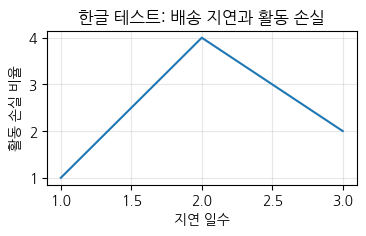

In [52]:
# =========================================
# [4] Korean font & koreanize_matplotlib setup (OS-agnostic, team-safe)
# - mac / windows / linux / colab 모두 대응
# - 없으면 자동 설치
# - matplotlib 캐시 정리 + 테스트까지 포함
# =========================================

import sys, subprocess, os
from pathlib import Path

print("🔤 Setting up Korean font for matplotlib...")

# 1) koreanize_matplotlib 설치 (없으면 자동 설치)
try:
    import koreanize_matplotlib
    print("✅ koreanize_matplotlib already installed.")
except ImportError:
    print("📦 Installing koreanize_matplotlib...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "koreanize_matplotlib"])
    import koreanize_matplotlib
    print("✅ koreanize_matplotlib installed.")

# 2) matplotlib 캐시 디렉토리 정리 (폰트 캐시 문제 방지)
import matplotlib
cache_dir = matplotlib.get_cachedir()
print("matplotlib cache dir:", cache_dir)

try:
    for f in Path(cache_dir).glob("*"):
        pass  # 캐시는 굳이 삭제하지 않고 koreanize가 처리하게 둠
except Exception:
    pass

# 3) 적용
import matplotlib.pyplot as plt
import koreanize_matplotlib

print("✅ Korean font setup complete.")

# 4) 테스트 플롯 (깨지면 바로 알 수 있도록)
plt.figure(figsize=(4,2))
plt.plot([1,2,3], [1,4,2])
plt.title("한글 테스트: 배송 지연과 활동 손실")
plt.xlabel("지연 일수")
plt.ylabel("활동 손실 비율")
plt.grid(True, alpha=0.3)
plt.show()


In [53]:
# Colab/Notebook 환경에서 패키지 설치
import sys, subprocess

subprocess.check_call([sys.executable, "-m", "pip", "install", "-U", "pip"])
subprocess.check_call([sys.executable, "-m", "pip", "install", "pandas", "numpy", "matplotlib"])
print("✅ Installed pandas/numpy/matplotlib")


✅ Installed pandas/numpy/matplotlib


# 프로젝트 시작

## 셀 0. (권장) 자동 리로드 + 기본 임포트

In [54]:
# =========================================
# Cell 0) Dev quality-of-life
# - src/*.py 수정 사항이 노트북 실행에 즉시 반영되도록 설정
# =========================================
%load_ext autoreload
%autoreload 2

import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 셀 1. (권장) 한글 폰트(koreanize_matplotlib)


In [55]:
# =========================================
# Cell 1) Korean font setup (koreanize_matplotlib)
# - mac/windows/linux 모두에서 한글 깨짐 방지
# =========================================
try:
    import koreanize_matplotlib  # noqa: F401
except ImportError:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "koreanize_matplotlib"])
    import koreanize_matplotlib  # noqa: F401

print("✅ koreanize_matplotlib applied.")


✅ koreanize_matplotlib applied.


## 셀 2. 데이터 로드
- CSV 경로, datetime 파싱, 로컬 실행 안정성
- 여기서 깨지면 데이터 배치 문제라는 신호

In [56]:
# =========================================
# Cell 2) Load data (orders, order_items)
# - dataset 폴더에서 CSV 로드
# - 날짜 컬럼 parse_dates 처리
# =========================================

def find_file(candidates):
    """여러 경로 후보 중 실제 존재하는 첫 파일 경로를 반환"""
    for p in candidates:
        p = Path(p)
        if p.exists():
            return p
    raise FileNotFoundError(
        "CSV 파일을 찾지 못했습니다. 아래 경로 중 실제 위치로 수정하세요:\n" +
        "\n".join([str(Path(c)) for c in candidates])
    )

# 프로젝트 구조에 맞춰 dataset 위치 후보를 여러 개 둡니다.
# (팀원이 노트북을 어디서 실행하든 찾도록)
orders_path = find_file([
    "./dataset/olist_orders_dataset.csv",
    "../dataset/olist_orders_dataset.csv",
    "./data/olist_orders_dataset.csv",
    "../data/olist_orders_dataset.csv",
])

items_path = find_file([
    "./dataset/olist_order_items_dataset.csv",
    "../dataset/olist_order_items_dataset.csv",
    "./data/olist_order_items_dataset.csv",
    "../data/olist_order_items_dataset.csv",
])

print("orders_path:", orders_path)
print("items_path :", items_path)

orders = pd.read_csv(
    orders_path,
    parse_dates=["order_purchase_timestamp", "order_delivered_customer_date", "order_estimated_delivery_date"],
)

order_items = pd.read_csv(items_path)

print("orders shape:", orders.shape)
print("order_items shape:", order_items.shape)
orders.head(2)


orders_path: ../data/olist_orders_dataset.csv
items_path : ../data/olist_order_items_dataset.csv
orders shape: (99441, 8)
order_items shape: (112650, 7)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13


## 셀 3. 주문-셀러(Order-Seller) 베이스 테이블 생성 (os_df)
| 목표: order_items와 orders를 조인해 주문-셀러 단위 테이블을 만듭니다.
| (한 주문에 한 셀러가 대부분이지만, 안전하게 seller_id + order_id 단위로 봅니다)

In [57]:
# =========================================
# Cell 3) Build order-seller base table (os_df)
# - order_items (seller_id, order_id) + orders (배송 관련 timestamp)
# - 주문-셀러 단위로 분석 가능하게 정리
# =========================================

# (1) 필요한 컬럼만 사용(불필요한 join 폭발 방지)
orders_cols = [
    "order_id",
    "order_status",
    "order_purchase_timestamp",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
]
items_cols = ["order_id", "seller_id"]

os_df = (
    order_items[items_cols]
    .merge(orders[orders_cols], on="order_id", how="left")
)

print("os_df shape:", os_df.shape)
os_df.head(3)


os_df shape: (112650, 6)


,order_id,seller_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05


## 셀 4. 배송 지연일수 계산 + delivered 필터
| 목표: delivery_delay_days = delivered_customer_date - estimated_delivery_date
| 분석은 “배송완료(delivered)” 주문만 사용합니다.

In [58]:
# =========================================
# Cell 4) Delivery delay definition + delivered filter
# - delivery_delay_days = actual - estimated (days)
# - delivered 주문만 사용 (배송일/예정일 결측 제거)
# =========================================

# delivered만 대상으로 배송일/예정일이 있는 데이터만 유지
os_delivered = os_df[
    (os_df["order_status"] == "delivered") &
    os_df["order_delivered_customer_date"].notna() &
    os_df["order_estimated_delivery_date"].notna() &
    os_df["order_purchase_timestamp"].notna()
].copy()

# 배송지연일: (실제수령일 - 예상배송일)
os_delivered["delivery_delay_days"] = (
    os_delivered["order_delivered_customer_date"] - os_delivered["order_estimated_delivery_date"]
).dt.days

# 주신 “image.png” 결과 재현을 위해:
# - late_days는 clip하지 않고 그대로 사용(조기배송 음수 포함 가능)
os_delivered["late_days"] = os_delivered["delivery_delay_days"].astype(int)

print("os_delivered shape:", os_delivered.shape)
os_delivered["late_days"].describe()


os_delivered shape: (110189, 8)


count    110189.000000
mean        -12.029041
std          10.158194
min        -147.000000
25%         -17.000000
50%         -13.000000
75%          -7.000000
max         188.000000
Name: late_days, dtype: float64

## 셀 5. “초기 K건(=20)” 정의 + 셀러 초기 노출(exposure) 계산
| 목표: 각 셀러의 주문을 시간순으로 정렬하고, 첫 20건만 early로 잡아서
| early_max_late(초기 20건 최대 지연)을 만듭니다.

In [59]:
# =========================================
# Cell 5) Early K orders exposure features
# - K=20: seller별 첫 K개 주문
# - early_max_late: 초기 K건 중 최대 지연일수(핵심 노출 변수)
# =========================================

K = 20

# seller별 주문을 시간순으로 정렬
# (초기 ipynb 재현 목적: tie-breaker(order_id) 없이 timestamp만 사용)
os_delivered = os_delivered.sort_values(["seller_id", "order_purchase_timestamp"]).reset_index(drop=True)

# seller별 주문 순번
os_delivered["order_rank"] = os_delivered.groupby("seller_id").cumcount() + 1

# 초기 K건
early = os_delivered[os_delivered["order_rank"] <= K].copy()

# seller별 초기 K건 노출/요약
seller_early = (
    early.groupby("seller_id", as_index=False)
    .agg(
        early_orders=("order_id", "nunique"),
        early_k_date=("order_purchase_timestamp", "max"),  # 초기 K건 마지막 주문 시점
        early_max_late=("late_days", "max"),
        early_p95_late=("late_days", lambda s: float(np.percentile(s, 95))),
        early_severe7_rate=("late_days", lambda s: float(np.mean(s >= 7))),
    )
)

# 초기 K건이 정확히 존재하는 셀러만 유지(초기 경험을 동일 조건으로 비교하기 위함)
seller_early = seller_early[seller_early["early_orders"] == K].copy()

print("seller_early shape:", seller_early.shape)
seller_early.head(3)


seller_early shape: (243, 6)


,seller_id,early_orders,early_k_date,early_max_late,early_p95_late,early_severe7_rate
23,01fdefa7697d26ad920e9e0346d4bd1b,20,2017-08-01 23:30:24,-4,-7.8,0.0
33,02f5837340d7eb4f653d676c7256523a,20,2018-01-13 10:35:28,-11,-12.9,0.0
34,02f623a8eb246f3c5f7c2f96462654e6,20,2018-07-11 18:56:23,-6,-7.9,0.0


## 셀 6. 셀러 “향후 활동 지속성(outcome)” 계산
| 목표: “초기 20건 이후” 셀러가 얼마나 오래 활동했는지(기간)를 계산합니다.
| 여기서 remaining_active_days는 (셀러 마지막 주문 시점 - 초기 K건 마지막 주문 시점) 입니다.
| image.png의 y축(기간 손실 days)을 재현하려면 이 정의가 필요합니다.

In [60]:
# =========================================
# Cell 6) Seller outcome: remaining activity duration (days)
# - remaining_active_days = (seller_last_purchase_date - early_k_date).days
# - remaining_orders = (total_delivered_orders - K)
# =========================================

# seller별 전체 배송완료 주문 요약(분모/필터용)
seller_total = (
    os_delivered.groupby("seller_id", as_index=False)
    .agg(
        total_delivered_orders=("order_id", "nunique"),
        last_purchase=("order_purchase_timestamp", "max"),
        first_purchase=("order_purchase_timestamp", "min"),
    )
)

# early 정보와 결합해서 "초기 이후" 기간을 계산
seller_outcome = seller_early.merge(seller_total, on="seller_id", how="left")

# 초기 K건 이후 남은 주문 수(참고 지표)
seller_outcome["remaining_orders"] = seller_outcome["total_delivered_orders"] - K

# 초기 K건 마지막 주문 이후 ~ 마지막 주문까지의 기간(days)
seller_outcome["remaining_active_days"] = (
    seller_outcome["last_purchase"] - seller_outcome["early_k_date"]
).dt.days

# 음수/결측 방지(이상 데이터 방어)
seller_outcome = seller_outcome[
    seller_outcome["remaining_active_days"].notna() &
    (seller_outcome["remaining_active_days"] >= 0)
].copy()

print("seller_outcome shape:", seller_outcome.shape)
seller_outcome[["seller_id","total_delivered_orders","remaining_orders","remaining_active_days"]].head(3)


seller_outcome shape: (243, 11)


,seller_id,total_delivered_orders,remaining_orders,remaining_active_days
0,01fdefa7697d26ad920e9e0346d4bd1b,128,108,383
1,02f5837340d7eb4f653d676c7256523a,30,10,207
2,02f623a8eb246f3c5f7c2f96462654e6,44,24,42


## 셀 7. seller_kpi_50 생성 (배송완료 주문 50건 이상 셀러만)
| 사용자님이 “초기 20건이 아니라 50건 이상”으로 충분 표본 확보한다고 하셨으니,
| 여기서 seller_kpi_50을 만듭니다.
| 이 테이블이 바로 scan(df)의 df가 됩니다.

In [64]:
# =========================================
# Cell 7) Build seller_kpi_50 (eligible sellers)
# - 조건: 배송완료 주문 수 >= 50
# - early(=K=20) 노출 + 이후 활동(outcome) 결합한 KPI 테이블
# =========================================

seller_kpi = seller_early.merge(
    seller_outcome[[
        "seller_id",
        "total_delivered_orders",
        "remaining_orders",
        "remaining_active_days",
        "first_purchase",
        "last_purchase",
    ]],
    on="seller_id",
    how="inner"
)

# 배송완료 50건 이상 필터(충분 표본)
seller_kpi_50 = seller_kpi[seller_kpi["total_delivered_orders"] >= 50].copy()

# ✅ (추가) 필터 없는 전체 코호트 (초기 20건 충족 셀러 전부)
seller_kpi_all = seller_kpi.copy()

# ✅ (유지) 50건 이상 코호트도 별도로 유지
seller_kpi_50 = seller_kpi[seller_kpi["total_delivered_orders"] >= 50].copy()

print("seller_kpi_all:", seller_kpi_all.shape)
print("seller_kpi_50 :", seller_kpi_50.shape)

print("seller_kpi_50 shape:", seller_kpi_50.shape)
seller_kpi_50[["early_max_late","remaining_active_days","total_delivered_orders"]].describe()


seller_kpi_all: (243, 11)
seller_kpi_50 : (124, 11)
seller_kpi_50 shape: (124, 11)


,early_max_late,remaining_active_days,total_delivered_orders
count,124.000000,124.000000,124.000000
mean,6.258065,324.072581,174.290323
std,22.015099,127.925803,213.437936
min,-15.000000,14.000000,50.000000
25%,-4.250000,224.750000,66.750000
50%,1.000000,318.000000,92.000000
75%,11.000000,432.250000,166.750000
max,152.000000,562.000000,1145.000000


## 셀 8. (핵심) 주신 코드 그대로: median 기반 threshold scan + image.png 스타일 그래프 출력
| 아래 셀은 사용자가 제공한 코드 로직을 그대로 적용합니다.
| (hi/lo 분리 + median 차이 + t=1..15 스캔)

In [63]:
# t별 위험군/정상군 표본 수 확인 (매우 중요)
df = seller_kpi_50.copy()
delay_col = "early_max_late"
y_col = "remaining_active_days"

rows = []
for t in range(1, 16):
    hi = df[df[delay_col] >= t]
    lo = df[df[delay_col] <  t]
    rows.append({"t": t, "n_hi": len(hi), "n_lo": len(lo)})

counts = pd.DataFrame(rows)
counts


,t,n_hi,n_lo
0,1,63,61
1,2,57,67
2,3,51,73
3,4,50,74
4,5,46,78
5,6,44,80
6,7,41,83
7,8,40,84
8,9,39,85
9,10,34,90


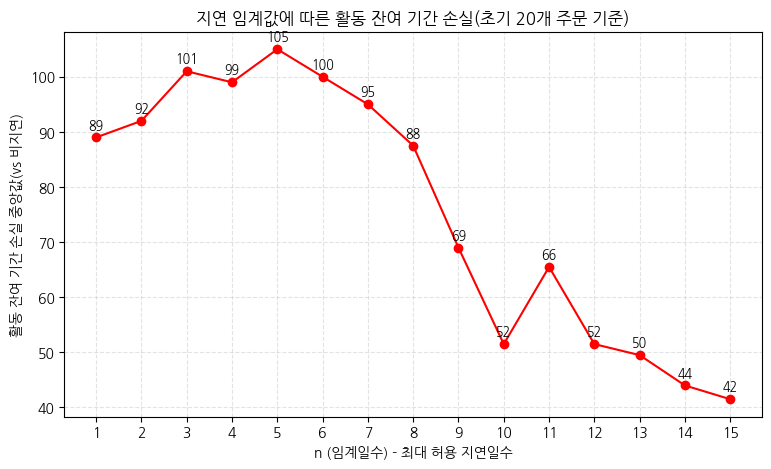

,t,loss_days,n_hi,n_lo
0,1,89.0,144,99
1,2,92.0,136,107
2,3,101.0,127,116
3,4,99.0,125,118
4,5,105.0,116,127
5,6,100.0,109,134
6,7,95.0,104,139
7,8,87.5,99,144
8,9,69.0,91,152
9,10,51.5,81,162


In [66]:
# =========================================
# Cell 8) EXACT scan code (median lo - median hi) + image.png style plot
# - df: seller_kpi_50
# - delay_col: early_max_late
# - y_col: remaining_active_days  (days 스케일)
# =========================================
df = seller_kpi_all.copy()     # ✅ image.png 재현용 코호트
delay_col = "early_max_late"
y_col = "remaining_active_days"

rows = []
for t in range(1, 16):
    hi = df[df[delay_col] >= t]
    lo = df[df[delay_col] <  t]
    loss = lo[y_col].median() - hi[y_col].median()
    rows.append({"t": t, "loss_days": loss, "n_hi": len(hi), "n_lo": len(lo)})

scan = pd.DataFrame(rows)

plt.figure(figsize=(9, 5))
plt.plot(scan["t"], scan["loss_days"], marker="o", color="red")
plt.xticks(scan["t"])
plt.xlabel("n (임계일수) - 최대 허용 지연일수")
plt.ylabel("활동 잔여 기간 손실 중앙값(vs 비지연)")
plt.title("지연 임계값에 따른 활동 잔여 기간 손실(초기 20개 주문 기준)")
plt.grid(True, linestyle="--", alpha=0.35)

for t, y in zip(scan["t"], scan["loss_days"]):
    if pd.notna(y):
        plt.text(t, y + 1, f"{int(round(y))}", ha="center", va="bottom", fontsize=9)

plt.savefig("image.png", bbox_inches="tight", dpi=150)
plt.show()

scan

